# part B

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('network_backup_dataset.csv')

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict, KFold, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn import datasets
from sklearn import linear_model
from sklearn import metrics
from sklearn import svm
from sklearn import model_selection
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.ensemble import RandomForestRegressor

In [2]:
dataset = pd.read_csv('network_backup_dataset.csv')
dataset = dataset.replace({'Day of Week':{'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,
'Saturday':6,'Sunday':7}})
workflowdict = dict()
filedict = dict()
for wf in dataset['Work-Flow-ID']:
    workflowdict[wf] = int(wf[10:])
for f in dataset['File Name']:
    filedict[f] = int(f[5:])
dataset = dataset.replace({'Work-Flow-ID':workflowdict})
dataset = dataset.replace({'File Name':filedict})

# i.

('Average training RMSE:', 0.06058209261911358)
('Average test RMSE:', 0.06068707712038835)


C:\Users\tians\Anaconda2\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


('Out of bag error: ', 0.33477840561010175)


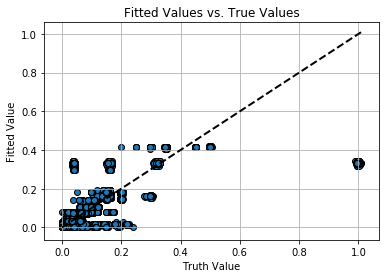

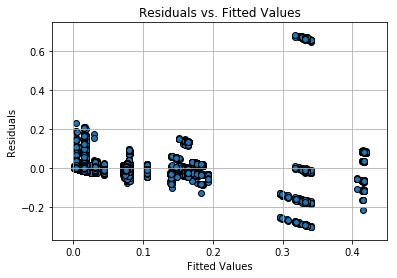

In [3]:
rf = RandomForestRegressor(n_estimators=20, max_features=5, max_depth=4, 
                           bootstrap=True, oob_score=False, n_jobs=-1)
kf = KFold(n_splits=10)
train_rmse = list()
test_rmse = list()
predicted = list()
truth = list()
data = dataset.values
for train_index, test_index in kf.split(data):
    data_train, data_test = data[train_index], data[test_index]
    rf.fit(data_train[:,[0,1,2,3,4]],data_train[:,5])
    train_predict = rf.predict(data_train[:,[0,1,2,3,4]])
    train_true = data_train[:,5]
    test_predict = rf.predict(data_test[:,[0,1,2,3,4]])
    test_true = data_test[:,5]
    predicted.extend(test_predict.tolist())
    truth.extend(test_true.tolist())
    train_rmse.append(mean_squared_error(train_true, train_predict))
    test_rmse.append(mean_squared_error(test_true, test_predict))

predicted = np.asarray(predicted)
truth = np.asarray(truth)

print('Average training RMSE:', sqrt(np.mean(train_rmse)))
print('Average test RMSE:', sqrt(np.mean(test_rmse)))

rf = RandomForestRegressor(n_estimators=20, max_features=5, max_depth=4, 
                           bootstrap=True, n_jobs=-1)
prediction = cross_val_predict(rf, data_train[:,[0,1,2,3,4]], data_train[:,5], cv=10)

rf = RandomForestRegressor(n_estimators=20, max_features=5, max_depth=4, 
                           bootstrap=True, oob_score=True, n_jobs=-1)
rf.fit(data_train[:,[0,1,2,3,4]], data_train[:,5])
oob = rf.oob_score_
print("Out of bag error: ", 1-oob)

plt.figure()
plt.scatter(truth, predicted, edgecolors=(0, 0, 0))
plt.plot([truth.min(), truth.max()], [truth.min(), truth.max()], 'k--', lw=2)
plt.xlabel('Truth Value')
plt.ylabel('Fitted Value')
plt.title('Fitted Values vs. True Values')
plt.grid(True)
plt.show()

plt.figure()
plt.scatter(predicted, truth-predicted, edgecolors=(0, 0, 0))
#plt.plot([truth.min(), truth.max()], [truth.min(), truth.max()], 'k--', lw=2)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.grid(True)
plt.show()

# ii.

In [4]:
import warnings
warnings.filterwarnings('ignore')

num_trees_min = 1
num_trees_max = 200
num_features_min = 1
num_features_max = 5

bag_errors = []
rmses = []

for num_features in range(num_features_min, num_features_max+1):
    bag_errors_for_cur_feature = []
    rmses_cur_feature = []
    for num_trees in range(num_trees_min, num_trees_max+1):
        rf = RandomForestRegressor(n_estimators=num_trees, max_features=num_features, max_depth=4, 
                           bootstrap=True, oob_score=True, n_jobs=-1)
        rf.fit(data_train[:,[0,1,2,3,4]],data_train[:,5])
        train_predict = rf.predict(data_train[:,[0,1,2,3,4]])
        train_true = data_train[:,5]
        test_predict = rf.predict(data_test[:,[0,1,2,3,4]])
        test_true = data_test[:,5]
        
        bag_errors_for_cur_feature.append(1-rf.oob_score_)
        rmses_cur_feature.append(mean_squared_error(test_true, test_predict))
        
    rmses.append(rmses_cur_feature)
    bag_errors.append(bag_errors_for_cur_feature)

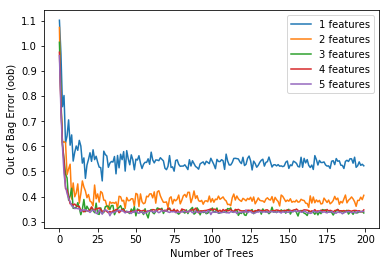

In [5]:
#Figure 1
fig, ax = plt.subplots()
i = 0
for oob in bag_errors:
    ax.plot(oob, label=str(i+1)+" features")
    i+=1
    
ax.set_xlabel('Number of Trees')
ax.set_ylabel('Out of Bag Error (oob)')
plt.legend()
plt.show()

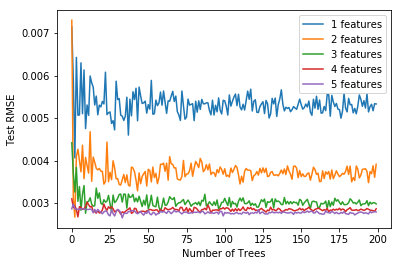

In [6]:
fig, ax = plt.subplots()

i=0
for rmse in rmses:
    ax.plot(rmse, label=str(i+1)+" features")
    i+=1
    
ax.set_xlabel('Number of Trees')
ax.set_ylabel('Test RMSE')
plt.legend()
plt.show()

In [7]:
import warnings
warnings.filterwarnings('ignore')

min_depth = 1
max_depth = 30

bag_errors = []
test_rmses = []
train_rmses = []
depths = np.linspace(1, max_depth, max_depth)

for depth in range(min_depth, max_depth+1):
    rf = RandomForestRegressor(n_estimators=20, max_features=5, max_depth=depth, 
                       bootstrap=True, oob_score=True, n_jobs=-1)
    rf.fit(data_train[:,[0,1,2,3,4]],data_train[:,5])
    train_predict = rf.predict(data_train[:,[0,1,2,3,4]])
    train_true = data_train[:,5]
    test_predict = rf.predict(data_test[:,[0,1,2,3,4]])
    test_true = data_test[:,5]
        
    bag_errors.append(1-rf.oob_score_)
    train_rmses.append(mean_squared_error(train_true, train_predict))
    test_rmses.append(mean_squared_error(test_true, test_predict))

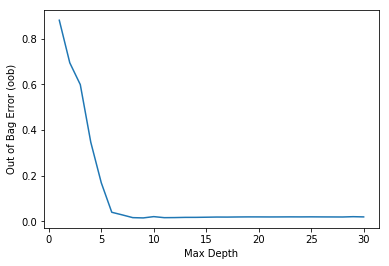

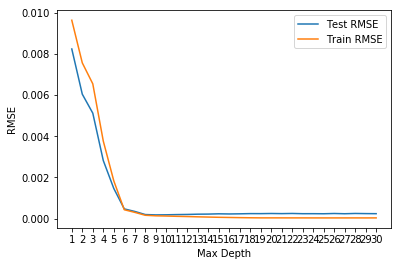

In [8]:
#Figure 1
fig, ax = plt.subplots()
ax.plot(depths, bag_errors) 
ax.set_xlabel('Max Depth')
ax.set_ylabel('Out of Bag Error (oob)')
plt.show()

fig, ax = plt.subplots()
ax.plot(depths, test_rmses, label="Test RMSE")
ax.plot(depths, train_rmses, label="Train RMSE")    
ax.set_xticks(depths)
ax.set_xlabel('Max Depth')
ax.set_ylabel('RMSE')
plt.legend()
plt.show()

Feature ranking:
1. feature 4 (0.393503)
2. feature 1 (0.277637)
3. feature 3 (0.170510)
4. feature 2 (0.158347)
5. feature 0 (0.000004)


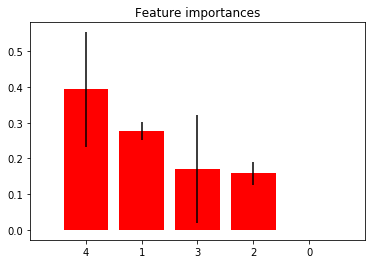

In [9]:
forest = RandomForestRegressor(n_estimators=20, max_features=5, max_depth=4, 
                   bootstrap=True, oob_score=True, n_jobs=-1)
forest.fit(data_train[:,[0,1,2,3,4]],data_train[:,5])
importances = forest.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(data_train[:,[0,1,2,3,4]].shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(data_train[:,[0,1,2,3,4]].shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(data_train[:,[0,1,2,3,4]].shape[1]), indices)
plt.xlim([-1, data_train[:,[0,1,2,3,4]].shape[1]])
plt.show()

In [10]:
from sklearn.tree import export_graphviz

#export_graphviz()
forest = RandomForestRegressor(n_estimators=20, max_features=5, max_depth=4, 
                   bootstrap=True, oob_score=True, n_jobs=-1)
forest.fit(data_train[:,[0,1,2,3,4]], data_train[:,5])
estimator = forest.estimators_[0]

export_graphviz(estimator, out_file='tree.dot')

import os
cmd = 'dot -Tpng tree.dot -o tree.png'
os.system(cmd)

from PIL import Image
image = Image.open("tree.png")
image.show()